# Node classification - Synthetic dataset

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns
from matplotlib import axes
import os 
import pandas as pd
import json

import sys, os
sys.path.append('/cluster/home/kamara/Explain')
from clutils.nbutils import *
from clutils.nbutils.params import get_param_ranges
os.getcwd()
sns.set()

In [2]:
pal = sns.color_palette("Paired", 11)
dict_color = {"random":pal[0], "distance":pal[1], "pagerank":pal[2], "sa": pal[3], "ig": pal[4], "gradcam": pal[5], "occlusion":pal[6], 
              "basic_gnnexplainer": pal[7], "gnnexplainer": pal[8], 
              "pgmexplainer":pal[9], "subgraphx": pal[10]}


In [3]:
sns.set_context("notebook", rc={"legend.fontsize":20, "legend.title_fontsize":20, 
                                "axes.titlesize":19,"axes.labelsize":17,
                               "xtick.labelsize" : 16, "ytick.labelsize" : 16})


In [4]:
dir = '/cluster/home/kamara/Explain/csv/node_classification/syn'

jsonpath = f'/cluster/home/kamara/Explain/configs/config_syn_sparsity_avg10expe.json'
ranges = get_param_ranges(jsonpath)

df_sparsity = pd.read_csv(os.path.join(dir, f'nc_syn_sparsity_avg10expe.csv'), index_col = 0)
res = df_sparsity.groupby(by=['dataset', 'sparsity', 'explainer_name', 'true_label_as_target', 'hard_mask']).mean()
res = res.reset_index()

In [5]:
def explainer_type(row):
    if row['explainer_name'] in ['basic_gnnexplainer', 'gnnexplainer', 'pgmexplainer', 'occlusion', 'subgraphx'] :
      return('pertubation')
    elif row['explainer_name'] in ['sa', 'ig', 'gradcam'] :
      return('gradient')
    return('baseline')

df_sparsity['type'] = df_sparsity.apply(lambda row: explainer_type(row), axis=1)

In [6]:
df_sparsity["1-fidelity_acc-"] = 1- df_sparsity["fidelity_acc-"]
df_sparsity["1-fidelity_prob-"] = 1- df_sparsity["fidelity_prob-"]
df_sparsity['charact'] = 2 * df_sparsity['fidelity_prob+'] * (1-df_sparsity['fidelity_prob-'])/ (df_sparsity['fidelity_prob+']  + 1-df_sparsity['fidelity_prob-'])


In [7]:
df_sparsity["1-fidelity_gnn_acc-"] = 1- df_sparsity["fidelity_gnn_acc-"]
df_sparsity["1-fidelity_gnn_prob-"] = 1- df_sparsity["fidelity_gnn_prob-"]
df_sparsity['charact_gnn'] = 2 * df_sparsity['fidelity_gnn_prob+'] * (1-df_sparsity['fidelity_gnn_prob-'])/ (df_sparsity['fidelity_gnn_prob+']  + 1-df_sparsity['fidelity_gnn_prob-'])


In [8]:
df_sparsity = df_sparsity.reset_index()
df_sparsity

,dataset,true_label_as_target,hard_mask,sparsity,explainer_name,num_test,fidelity_acc+,fidelity_acc-,fidelity_prob+,fidelity_prob-,...,number_of_edges,mask_sparsity_init,non_zero_values_init,type,1-fidelity_acc-,1-fidelity_prob-,charact,1-fidelity_gnn_acc-,1-fidelity_gnn_prob-,charact_gnn
0,syn1,False,False,0.000,basic_gnnexplainer,100.0,-1.000,-1.000,-1.000000,-1.000000,...,4110.0,0.941525,240.332,pertubation,2.000,2.000000,-4.000000,0.554,0.607394,0.545426
1,syn1,False,False,0.000,distance,100.0,-1.000,-1.000,-1.000000,-1.000000,...,4110.0,0.012605,4058.193,baseline,2.000,2.000000,-4.000000,0.392,0.438536,0.482939
2,syn1,False,False,0.000,gnnexplainer,100.0,-1.000,-1.000,-1.000000,-1.000000,...,4110.0,0.941525,240.332,pertubation,2.000,2.000000,-4.000000,0.485,0.532703,0.524839
3,syn1,False,False,0.000,ig,100.0,-1.000,-1.000,-1.000000,-1.000000,...,4110.0,0.061156,3858.650,gradient,2.000,2.000000,-4.000000,0.365,0.441719,0.357249
4,syn1,False,False,0.000,occlusion,100.0,-1.000,-1.000,-1.000000,-1.000000,...,4110.0,0.002191,4100.994,pertubation,2.000,2.000000,-4.000000,0.626,0.684633,0.632036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,syn6,True,True,0.997,occlusion,100.0,0.240,0.536,0.218372,0.495692,...,3948.0,0.000763,3944.987,pertubation,0.464,0.504308,0.304774,2.000,2.000000,-4.000000
716,syn6,True,True,0.997,pagerank,100.0,0.604,0.005,0.563150,-0.006766,...,3948.0,0.229770,3040.870,baseline,0.995,1.006766,0.722281,2.000,2.000000,-4.000000
717,syn6,True,True,0.997,pgmexplainer,100.0,0.488,0.267,0.446927,0.247849,...,3948.0,0.797064,801.192,pertubation,0.733,0.752151,0.560692,2.000,2.000000,-4.000000
718,syn6,True,True,0.997,random,100.0,0.132,0.605,0.129106,0.564257,...,3948.0,0.001236,3943.120,baseline,0.395,0.435743,0.199193,2.000,2.000000,-4.000000


# Mask statistics - select dataset

In [9]:
input_dataset = "syn1"

df_mask_dataset = df_sparsity[(df_sparsity.dataset==input_dataset)&(df_sparsity.true_label_as_target==True)&(df_sparsity.hard_mask==True)]
dfc = df_mask_dataset[["sparsity", "explainer_name", "mask_size_transf", "mask_entropy_transf", "max_avg_transf", "charact"]]
pd.pivot_table(dfc, values=["mask_size_transf", "mask_entropy_transf", "max_avg_transf", "charact"], index=['explainer_name'], columns='sparsity')

charact                                \
sparsity               0.000     0.700     0.990     0.997   
explainer_name                                               
basic_gnnexplainer  0.791251  0.784442  0.544581  0.363258   
distance            0.791251  0.791122  0.782656  0.692616   
gnnexplainer        0.692893  0.682594  0.499881  0.369060   
ig                  0.726669  0.320995  0.308330  0.254847   
occlusion           0.662903  0.359200  0.359180  0.359286   
pagerank            0.791251  0.791302  0.790370  0.778474   
pgmexplainer        0.791608  0.791328  0.690231  0.598980   
random              0.721724  0.400473  0.228950  0.224343   
sa                  0.661950 -0.000235  0.002655  0.011121   

                   mask_entropy_transf                                \
sparsity                         0.000     0.700     0.990     0.997   
explainer_name                                                         
basic_gnnexplainer            3.434250  3.393189  2.606266  2.209599   
distance                      8.183216  7.059308  3.538721  2.378079   
gnnexplainer                  3.404892  3.404343  2.604080  2.210206   
ig                            7.973736  6.813339  3.594680  2.469221   
occlusion                     8.306509  7.115765  3.710243  2.478372   
pagerank                      6.348113  5.644706  3.200210  2.453320   
pgmexplainer                  5.614582  5.519216  3.600782  2.477757   
random                        8.127732  7.111985  3.713568  2.484906   
sa                            8.125902  6.949064  3.683007  2.481060   

                   mask_size_transf                         max_avg_transf  \
sparsity                      0.000     0.700   0.990 0.997          0.000   
explainer_name                                                               
basic_gnnexplainer          261.956   238.808  32.673  12.0       0.324554   
distance                   4059.091  1233.000  41.000  12.0       0.077840   
gnnexplainer                261.956   238.808  32.673  12.0       0.304334   
ig                         3847.710  1172.401  40.997  12.0       0.592900   
occlusion                  4108.954  1233.000  41.000  12.0       0.886279   
pagerank                   2993.030  1233.000  41.000  12.0       0.001007   
pgmexplainer                741.060   520.768  39.379  12.0       0.252749   
random                     4104.910  1233.000  41.000  12.0       0.476568   
sa                         3969.258  1199.338  41.000  12.0       0.878276   

                                                  
sparsity               0.700     0.990     0.997  
explainer_name                                    
basic_gnnexplainer  0.305215  0.326116  0.813129  
distance            0.110237  0.206427  0.405767  
gnnexplainer        0.312334  0.333016  0.820929  
ig                  0.598212  0.649130  0.795298  
occlusion           0.898872  0.900957  0.901198  
pagerank            0.004736  0.080534  0.568339  
pgmexplainer        0.286509  0.561922  0.823960  
random              0.834887  0.993237  0.997870  
sa                  0.885789  0.905099  0.942367

# Performance Summary
## When label is true...

In [11]:
input_sparsity = 0.7

df_perf = df_sparsity[(df_sparsity.sparsity==input_sparsity)&(df_sparsity.true_label_as_target==True)]
dfc = df_perf[["dataset", "explainer_name", "charact", "hard_mask"]]
pd.pivot_table(dfc, values="charact", index=['explainer_name'], columns=['hard_mask', 'dataset'])

hard_mask              False                                          \
dataset                 syn1      syn3      syn4      syn5      syn6   
explainer_name                                                         
basic_gnnexplainer  0.544609 -0.002427  0.481755  0.439768  0.465585   
distance            0.467423 -0.005691  0.496230  0.498232  0.365270   
gnnexplainer        0.507021 -0.002326  0.505852  0.467413  0.412935   
ig                  0.272754 -0.001241  0.500877  0.577361  0.204456   
occlusion           0.354546 -0.000267  0.490374  0.471569  0.306892   
pagerank            0.701022  0.010490  0.504339  0.534297  0.711694   
pgmexplainer        0.729228 -0.002999  0.530669  0.672870  0.711208   
random              0.370776 -0.005837  0.467441  0.484068  0.364191   
sa                  0.078196 -0.000047  0.229036  0.457104  0.002963   

hard_mask               True                                          
dataset                 syn1      syn3      syn4      syn5      syn6  
explainer_name                                                        
basic_gnnexplainer  0.784442  0.029932  0.542265  0.675498  0.700905  
distance            0.791122  0.030229  0.542265  0.675498  0.719319  
gnnexplainer        0.682594  0.029721  0.488228  0.562265  0.607579  
ig                  0.320995  0.007123  0.517024  0.674825  0.361644  
occlusion           0.359200 -0.000240  0.512028  0.617930  0.307594  
pagerank            0.791302  0.030229  0.542265  0.675498  0.720537  
pgmexplainer        0.791328  0.030229  0.542270  0.675601  0.720462  
random              0.400473 -0.004376  0.470101  0.487607  0.393799  
sa                 -0.000235 -0.000047  0.200453  0.534180  0.004204

# Explain focus: Phenomenon

true_label_as_target = True

In [12]:
df = df_sparsity[df_sparsity['true_label_as_target']==True]

In [13]:
#### Robustness ####
df_sparse = df[df['sparsity'] == 0.997]
df_dense = df[df['sparsity'] == 0]
df_sparse = df_sparse[["dataset", "true_label_as_target", "hard_mask", "explainer_name", "charact"]].reset_index()
df_dense = df_dense[["dataset", "true_label_as_target", "hard_mask", "explainer_name", "charact"]].reset_index()
df_robust = pd.merge(df_dense, df_sparse, on=["dataset", "true_label_as_target", "hard_mask", "explainer_name"], how="outer", suffixes=["_0", "_0.997"])

df_robust["robustness"] = (df_robust["charact_0.997"]-df_robust["charact_0"])/0.997

robustness = pd.pivot_table(df_robust, values='robustness', index=['explainer_name'], columns='dataset')
robustness['robustness'] = robustness.mean(axis=1)
robustness.sort_values(by=['robustness'])

dataset,syn1,syn3,syn4,syn5,syn6,robustness
explainer_name,,,,,,
sa,-0.409939,0.003841,-0.222739,-0.156632,-0.414404,-0.239975
random,-0.379584,-0.017640,-0.034005,-0.113594,-0.378373,-0.184639
basic_gnnexplainer,-0.353524,-0.011951,-0.079379,-0.123147,-0.350087,-0.183617
occlusion,-0.280886,-0.003352,0.002994,-0.076532,-0.493400,-0.170235
ig,-0.267710,-0.007424,-0.052332,-0.133068,-0.227780,-0.137663
gnnexplainer,-0.266352,-0.012736,-0.027324,-0.048613,-0.286780,-0.128361
pgmexplainer,-0.186666,-0.001962,-0.110617,-0.173973,-0.157054,-0.126055
distance,-0.077761,-0.001014,-0.069748,-0.123345,-0.074085,-0.069191
pagerank,-0.009540,0.000324,-0.018106,-0.092757,0.004890,-0.023038


## Hard mask

In [14]:
df_hard = df[df.hard_mask==True]

### Initial analysis: initial sparsity, time, characterisation

In [15]:
df0 = df_hard.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean()
df0 = df0.reset_index()
df0s = df0[df0.sparsity==0.7]
res_init = df0s[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
res_init.groupby(by=['dataset', 'explainer_name']).mean()


mask_sparsity_init  non_zero_values_init  \
dataset explainer_name                                                 
syn1    basic_gnnexplainer            0.936264               261.956   
        distance                      0.012387              4059.091   
        gnnexplainer                  0.936264               261.956   
        ig                            0.063818              3847.710   
        occlusion                     0.000255              4108.954   
        pagerank                      0.271769              2993.030   
        pgmexplainer                  0.819693               741.060   
        random                        0.001233              4104.932   
        sa                            0.034244              3969.258   
syn3    basic_gnnexplainer            0.966024               172.600   
        distance                      0.009256              5032.978   
        gnnexplainer                  0.966024               172.600   
        ig                            0.000605              5076.928   
        occlusion                     0.000347              5078.237   
        pagerank                      0.541872              2327.290   
        pgmexplainer                  0.925733               377.276   
        random                        0.001177              5074.020   
        sa                            0.000672              5076.586   
syn4    basic_gnnexplainer            0.988876                21.692   
        distance                      0.005926              1938.444   
        gnnexplainer                  0.988876                21.692   
        ig                            0.327014              1312.322   
        occlusion                     0.041234              1869.593   
        pagerank                      0.917579               160.720   
        pgmexplainer                  0.981707                35.672   
        random                        0.001514              1947.047   
        sa                            0.256843              1449.156   
syn5    basic_gnnexplainer            0.990054                33.916   
        distance                      0.001255              3405.722   
        gnnexplainer                  0.990054                33.916   
        ig                            0.363782              2169.504   
        occlusion                     0.414979              1994.920   
        pagerank                      0.889779               375.854   
        pgmexplainer                  0.982361                60.150   
        random                        0.001291              3405.596   
        sa                            0.348270              2222.398   
syn6    basic_gnnexplainer            0.934914               256.960   
        distance                      0.034798              3810.619   
        gnnexplainer                  0.934914               256.960   
        ig                            0.036043              3805.704   
        occlusion                     0.000763              3944.987   
        pagerank                      0.229770              3040.870   
        pgmexplainer                  0.797064               801.192   
        random                        0.001236              3943.120   
        sa                            0.044135              3773.754   

                            number_of_edges     time  fidelity_prob+  \
dataset explainer_name                                                 
syn1    basic_gnnexplainer           4110.0  3.19848        0.651046   
        distance                     4110.0  0.01298        0.654603   
        gnnexplainer                 4110.0  3.97677        0.650675   
        ig                           4110.0  0.21699        0.233008   
        occlusion                    4110.0  0.66371        0.323458   
        pagerank                     4110.0  0.02229        0.654603   
        pgmexplainer                 4110.0  3.18497        0.65460

In [16]:
#### Initial mask sparsity ####
mask_spars_init = pd.pivot_table(res_init, values='mask_sparsity_init', index=['explainer_name'], columns='dataset')
mask_spars_init['mean_sparsity'] = mask_spars_init.mean(axis=1)
mask_spars_init.sort_values(by=['mean_sparsity'])

dataset,syn1,syn3,syn4,syn5,syn6,mean_sparsity
explainer_name,,,,,,
random,0.001233,0.001177,0.001514,0.001291,0.001236,0.001290
distance,0.012387,0.009256,0.005926,0.001255,0.034798,0.012724
occlusion,0.000255,0.000347,0.041234,0.414979,0.000763,0.091516
sa,0.034244,0.000672,0.256843,0.348270,0.044135,0.136833
ig,0.063818,0.000605,0.327014,0.363782,0.036043,0.158252
pagerank,0.271769,0.541872,0.917579,0.889779,0.229770,0.570154
pgmexplainer,0.819693,0.925733,0.981707,0.982361,0.797064,0.901312
basic_gnnexplainer,0.936264,0.966024,0.988876,0.990054,0.934914,0.963226
gnnexplainer,0.936264,0.966024,0.988876,0.990054,0.934914,0.963226


In [17]:
#### Computation Time ####
df_time = pd.pivot_table(res_init, values='time', index=['explainer_name'], columns='dataset')
df_time['mean_time'] = df_time.mean(axis=1)
df_time.sort_values(by=['mean_time'])

dataset,syn1,syn3,syn4,syn5,syn6,mean_time
explainer_name,,,,,,
random,0.00010,0.00010,0.00000,0.00004,0.00010,0.000068
sa,0.00411,0.00417,0.00430,0.00483,0.00316,0.004114
distance,0.01298,0.01786,0.00697,0.01224,0.01282,0.012574
pagerank,0.02229,0.02703,0.01314,0.02385,0.02005,0.021272
ig,0.21699,0.20706,0.19646,0.23789,0.18278,0.208236
occlusion,0.66371,0.52476,0.06721,0.14060,0.61362,0.401980
basic_gnnexplainer,3.19848,3.16683,3.18048,3.20476,3.23115,3.196340
pgmexplainer,3.18497,4.55439,3.92970,5.29812,3.20571,4.034578
gnnexplainer,3.97677,4.99599,4.30338,3.56720,4.08989,4.186646


In [18]:
#### Average characterization power among datasets for sparsity=0.99 ####
df_char = pd.pivot_table(res_init, values='charact', index=['explainer_name'], columns='dataset')
df_char['mean_charact'] = df_char.mean(axis=1)
df_char.sort_values(by=['mean_charact'])#.reset_index()

dataset,syn1,syn3,syn4,syn5,syn6,mean_charact
explainer_name,,,,,,
sa,-0.000235,-0.000047,0.200453,0.534180,0.004204,0.147711
random,0.400473,-0.004376,0.470101,0.487607,0.393799,0.349521
occlusion,0.359200,-0.000240,0.512028,0.617930,0.307594,0.359302
ig,0.320995,0.007123,0.517024,0.674825,0.361644,0.376322
gnnexplainer,0.682594,0.029721,0.488228,0.562265,0.607579,0.474077
basic_gnnexplainer,0.784442,0.029932,0.542265,0.675498,0.700905,0.546608
distance,0.791122,0.030229,0.542265,0.675498,0.719319,0.551687
pagerank,0.791302,0.030229,0.542265,0.675498,0.720537,0.551966
pgmexplainer,0.791328,0.030229,0.542270,0.675601,0.720462,0.551978


In [19]:
#### Average characterization power for Cora according to sparsity ####
df0 = df_hard.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean()
df0 = df0.reset_index()
res_init = df0[['dataset', 'explainer_name', 'sparsity', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
res_init.groupby(by=['dataset', 'explainer_name', 'sparsity']).mean()

df_char_cora = pd.pivot_table(res_init[res_init.dataset=="syn1"], values='charact', index=['explainer_name'], columns='sparsity')
df_char_cora['mean_charact'] = df_char_cora.mean(axis=1)
df_char_cora.sort_values(by=['mean_charact'])

sparsity,0.0,0.7,0.99,0.997,mean_charact
explainer_name,,,,,
sa,0.661950,-0.000235,0.002655,0.011121,0.168873
random,0.721724,0.400473,0.228950,0.224343,0.393873
ig,0.726669,0.320995,0.308330,0.254847,0.402710
occlusion,0.662903,0.359200,0.359180,0.359286,0.435142
gnnexplainer,0.692893,0.682594,0.499881,0.369060,0.561107
basic_gnnexplainer,0.791251,0.784442,0.544581,0.363258,0.620883
pgmexplainer,0.791608,0.791328,0.690231,0.598980,0.718037
distance,0.791251,0.791122,0.782656,0.692616,0.764411
pagerank,0.791251,0.791302,0.790370,0.778474,0.787849


### Analysis after mask tranformation

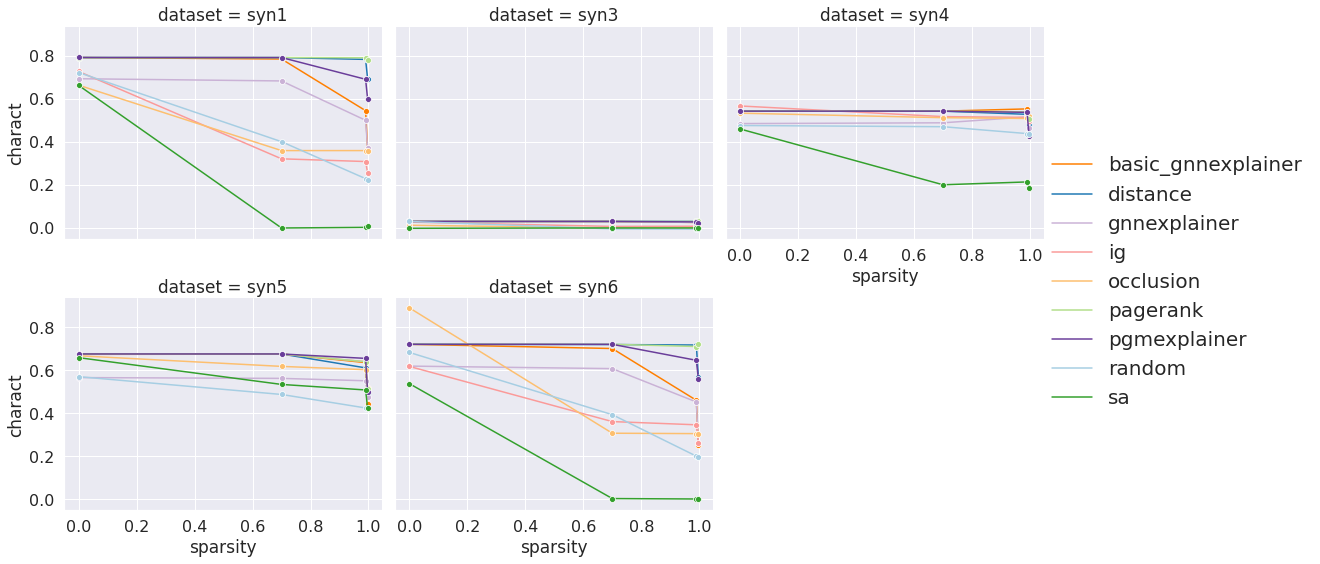

In [20]:
g = sns.FacetGrid(df_hard, col="dataset", height=4, aspect=1.25, col_wrap=3)
g.map_dataframe(sns.lineplot, x="sparsity", y="charact",
    hue="explainer_name", palette=dict_color, marker="o")

g.add_legend()

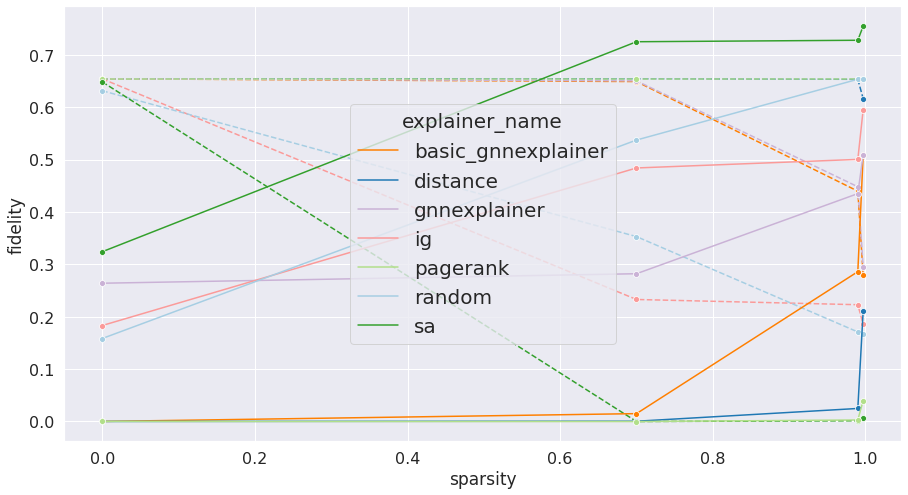

In [23]:
#### Fidelity Prob VS Sparsity ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_hard[df_hard.dataset=="syn1"],
    x="sparsity", y="fidelity_prob+",
    hue="explainer_name", palette=dict_color, marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_hard[df_hard.dataset=="syn1"],
    x="sparsity", y="fidelity_prob-",
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)


plt.ylabel('fidelity')
plt.show()

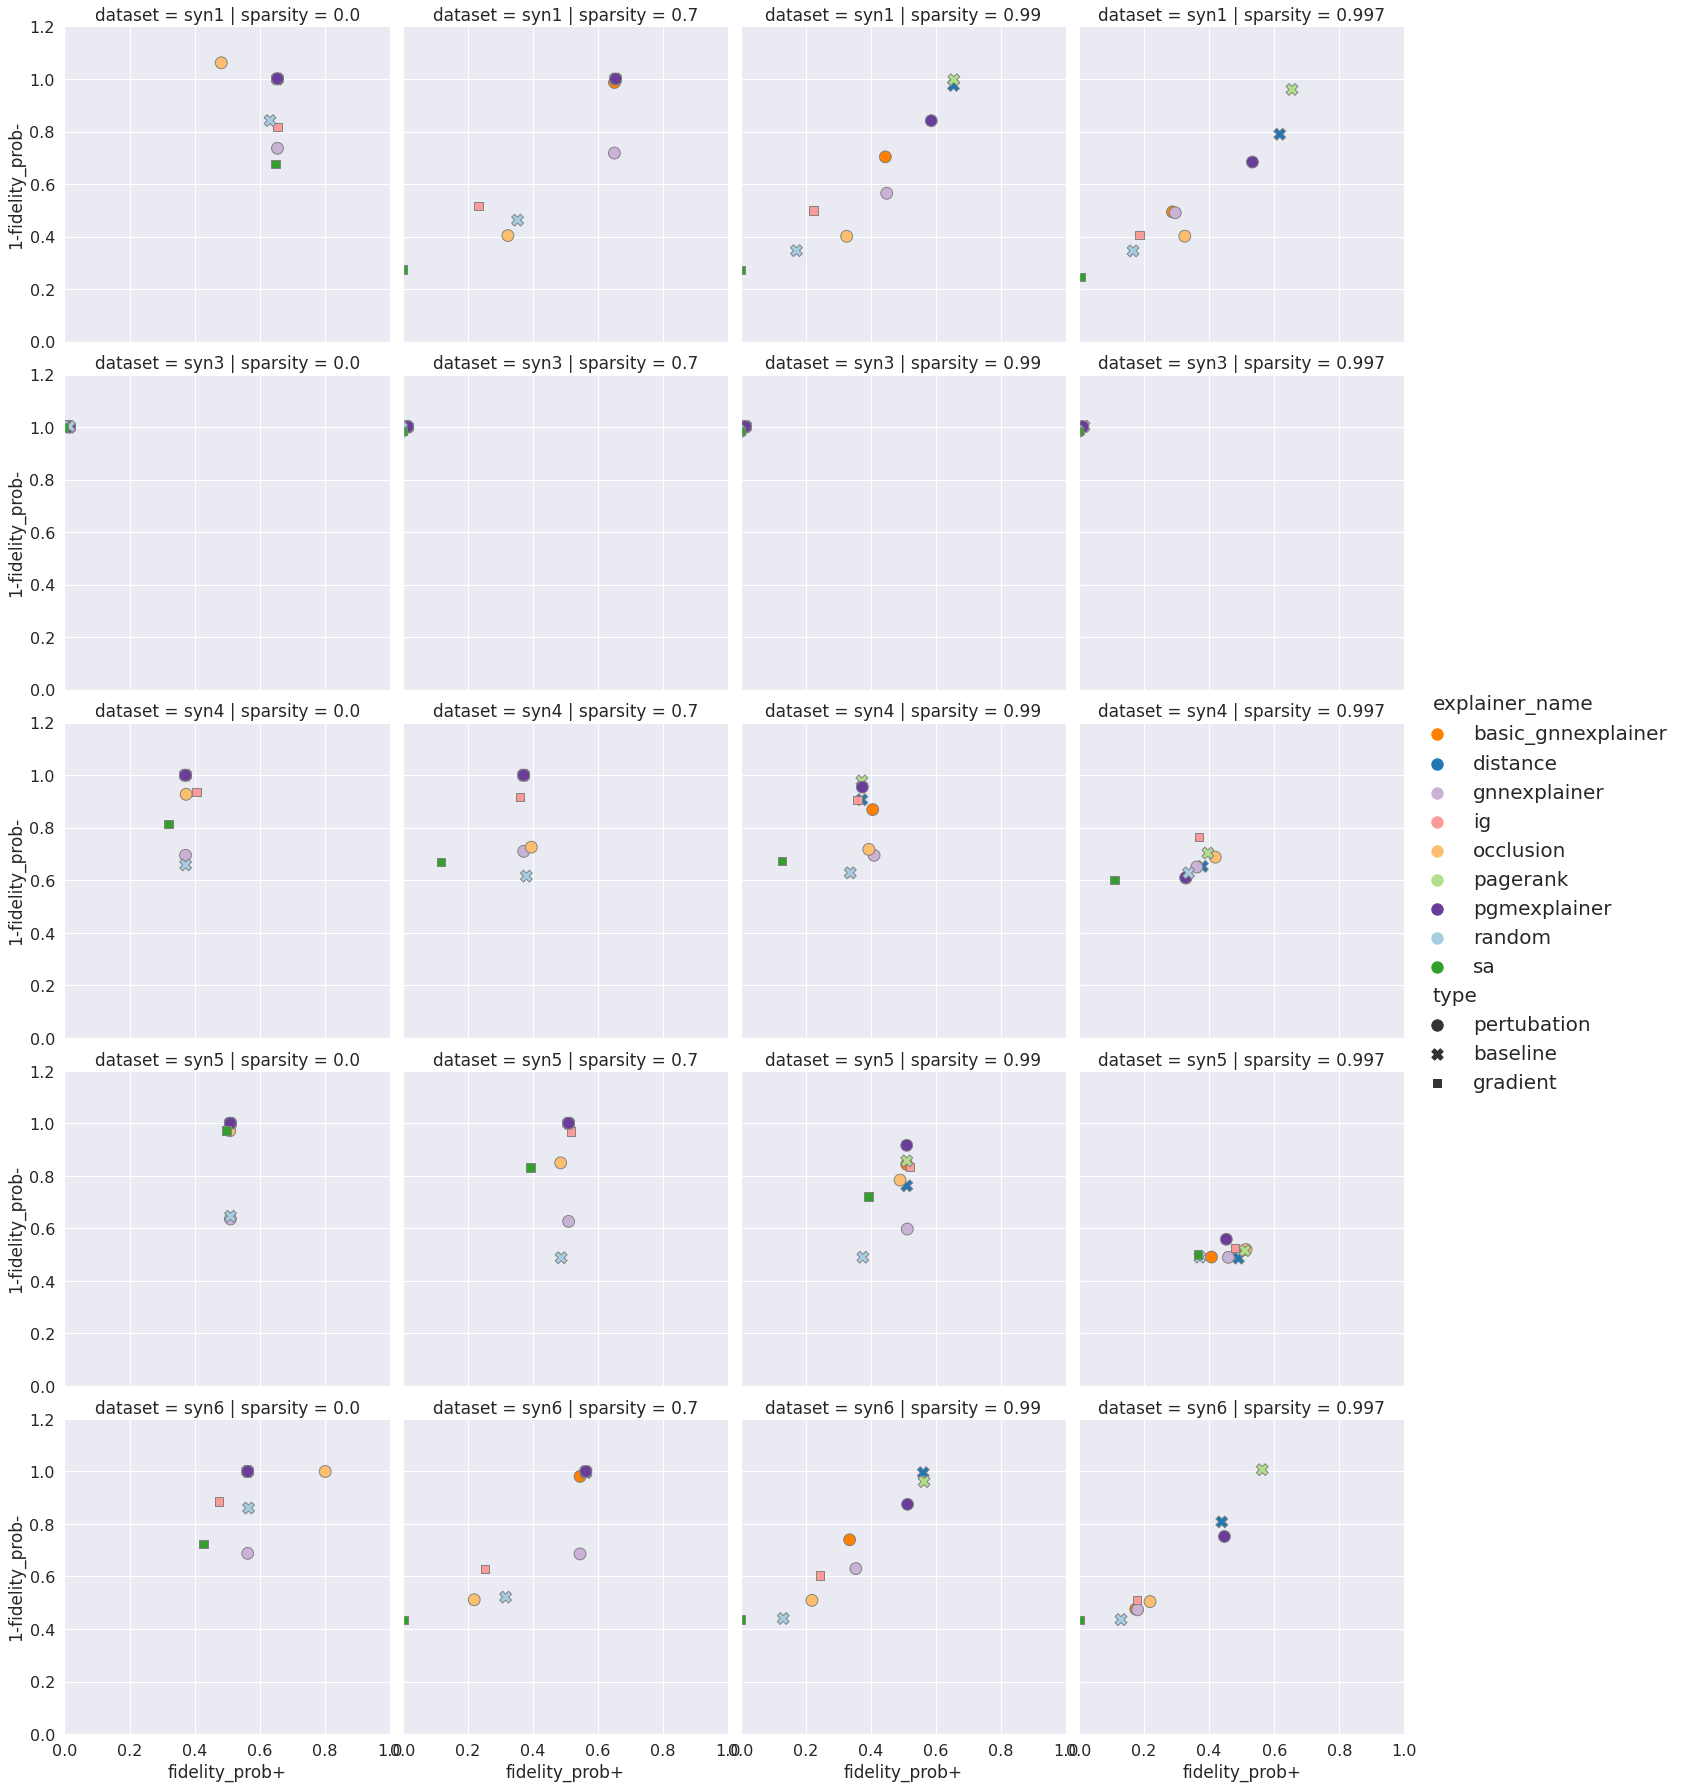

In [21]:
#### Fidelity Prob VS datasets & sparsity ####
g = sns.relplot(
    data=df_hard,
    x="fidelity_prob+", y="1-fidelity_prob-", col="sparsity", row="dataset", 
    hue="explainer_name", palette=dict_color, s=140, style="type", alpha =1, edgecolor="grey"
)
plt.xlim(0, 1)
plt.ylim(0, 1.2)

for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 
    

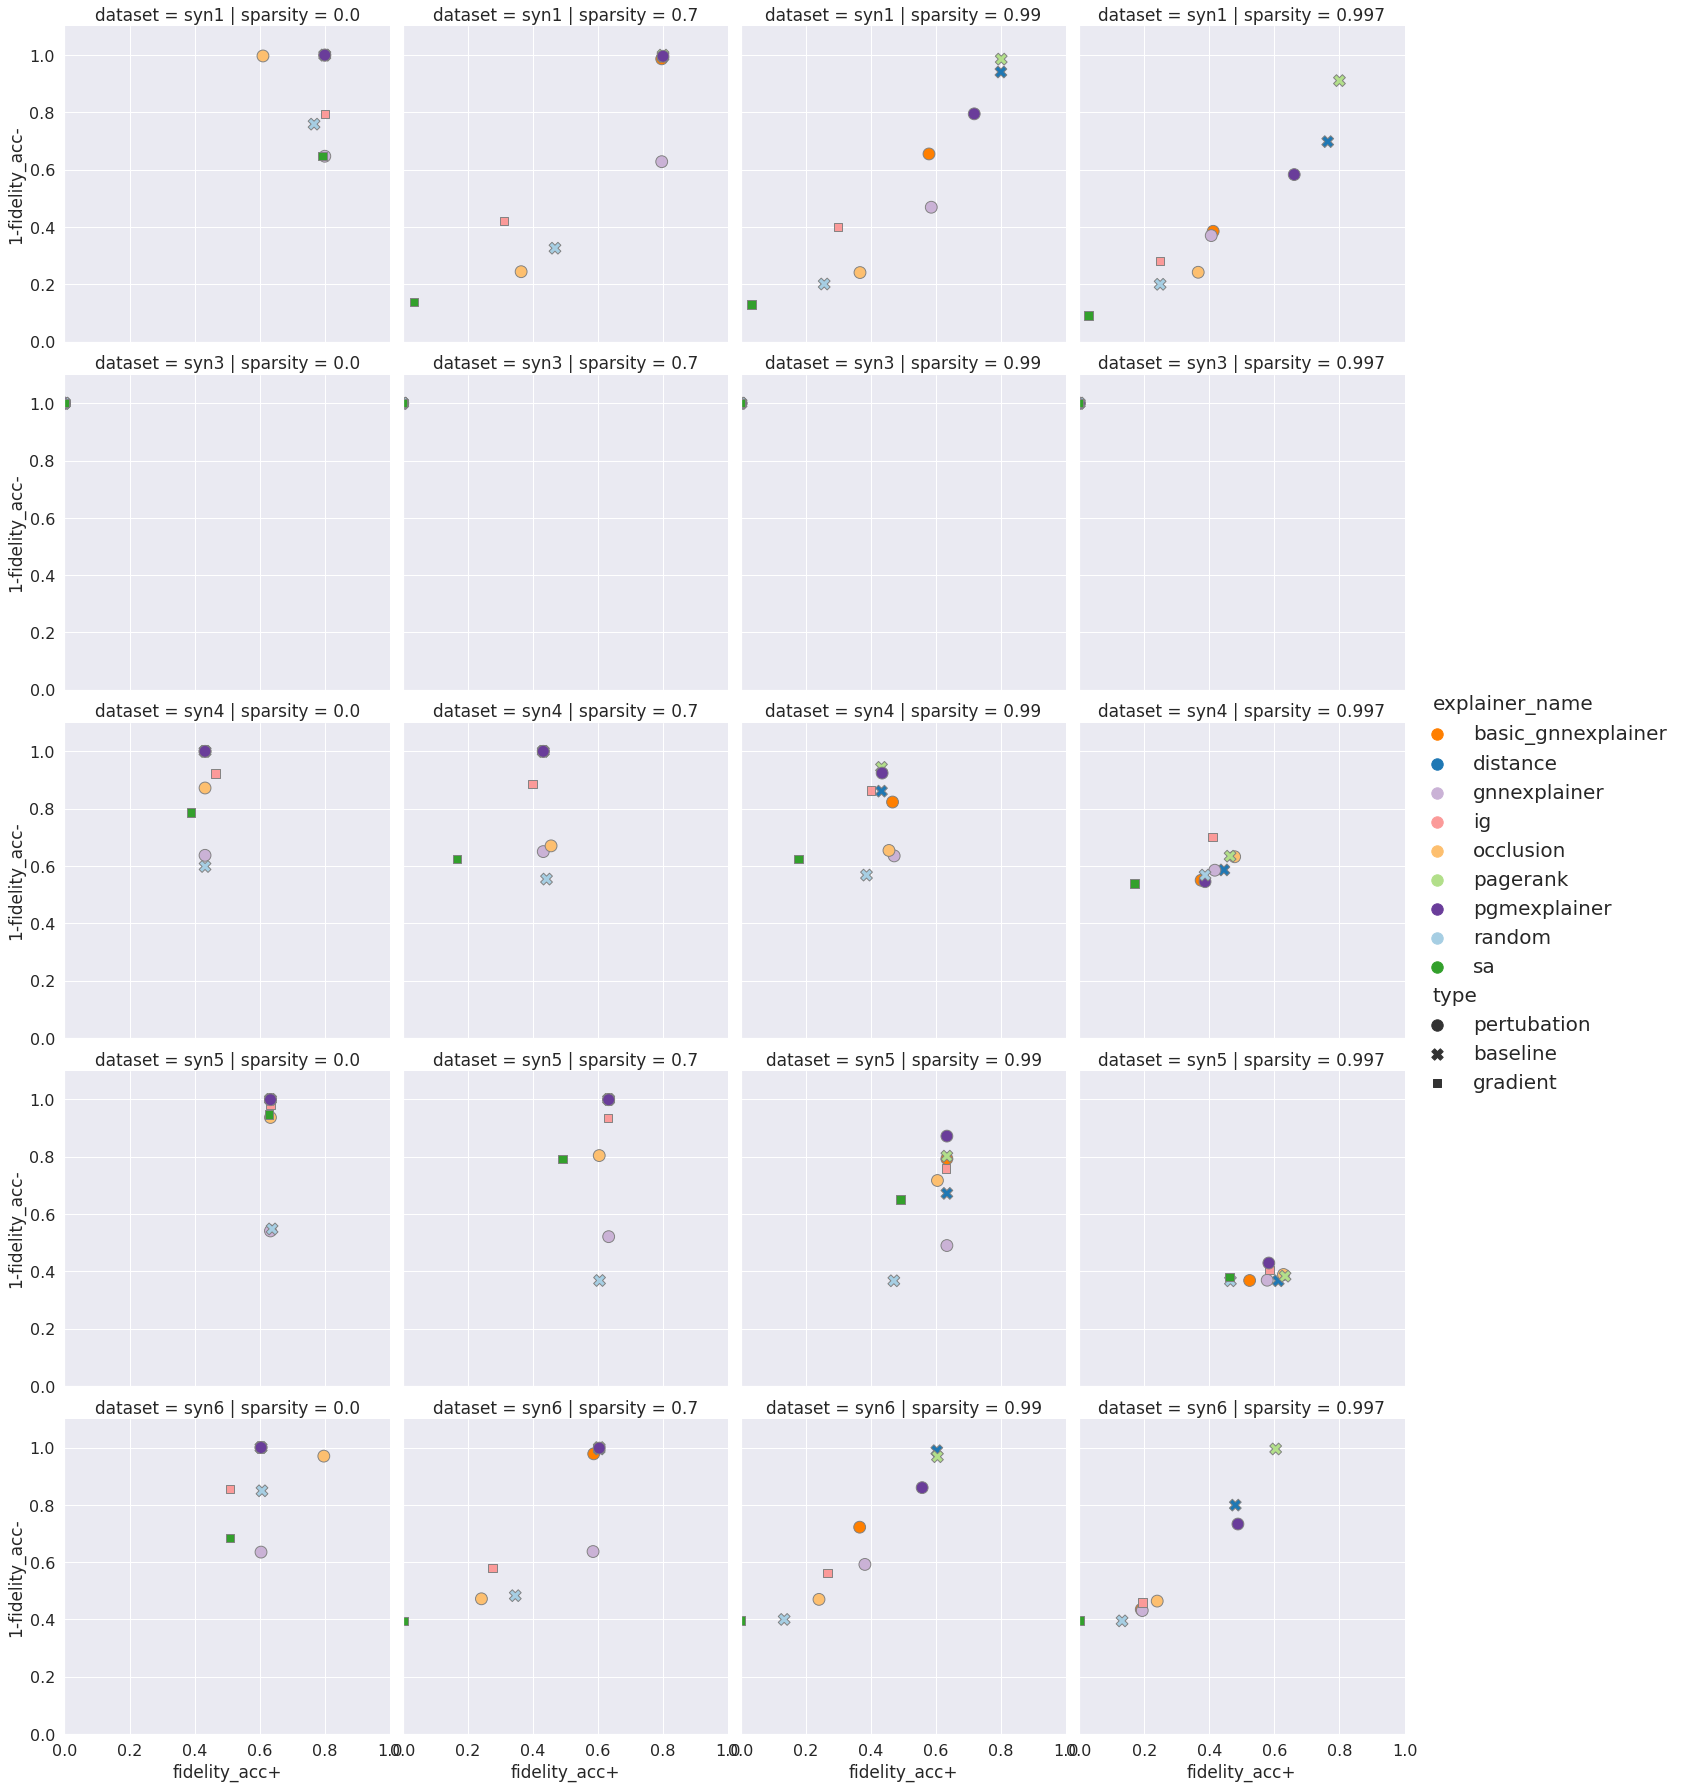

In [22]:
#### Fidelity Acc VS datasets & sparsity ####
g = sns.relplot(
        data=df_hard,
        x="fidelity_acc+", y="1-fidelity_acc-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha = 1, edgecolor="grey"
    )

plt.xlim(0, 1)
plt.ylim(0, 1.1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 


## Soft mask

In [36]:
df_soft = df[df.hard_mask==False]

In [37]:
df1 = df_soft.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean().reset_index()
df1s = df1[df1.sparsity==0.7]
res_init = df1s[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
res_init.groupby(by=['dataset', 'explainer_name']).mean()
#### Average characterization power among datasets for sparsity=0.7 ####
df_char = pd.pivot_table(res_init, values='charact', index=['explainer_name'], columns='dataset')
df_char['mean_charact'] = df_char.mean(axis=1)
df_char.sort_values(by=['mean_charact'])

dataset,syn1,syn3,syn4,syn5,syn6,mean_charact
explainer_name,,,,,,
sa,0.078196,-0.000047,0.229036,0.457104,0.002963,0.153450
ig,0.272754,-0.001241,0.500877,0.577361,0.204456,0.310841
occlusion,0.354546,-0.000267,0.490374,0.471569,0.306892,0.324623
random,0.370776,-0.005837,0.467441,0.484068,0.364191,0.336128
distance,0.467423,-0.005691,0.496230,0.498232,0.365270,0.364293
gnnexplainer,0.507021,-0.002326,0.505852,0.467413,0.412935,0.378179
basic_gnnexplainer,0.544609,-0.002427,0.481755,0.439768,0.465585,0.385858
pagerank,0.701022,0.010490,0.504339,0.534297,0.711694,0.492368
pgmexplainer,0.729228,-0.002999,0.530669,0.672870,0.711208,0.528195


In [38]:
#### Average characterization power for Cora according to sparsity ####
df1 = df_soft.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean().reset_index()
res_init = df1[['dataset', 'explainer_name', 'sparsity', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
res_init.groupby(by=['dataset', 'explainer_name', 'sparsity']).mean()

df_char_cora = pd.pivot_table(res_init[res_init.dataset=="cora"], values='charact', index=['explainer_name'], columns='sparsity')
df_char_cora['mean_charact'] = df_char_cora.mean(axis=1)
df_char_cora.sort_values(by=['mean_charact'])

sparsity,mean_charact
explainer_name,


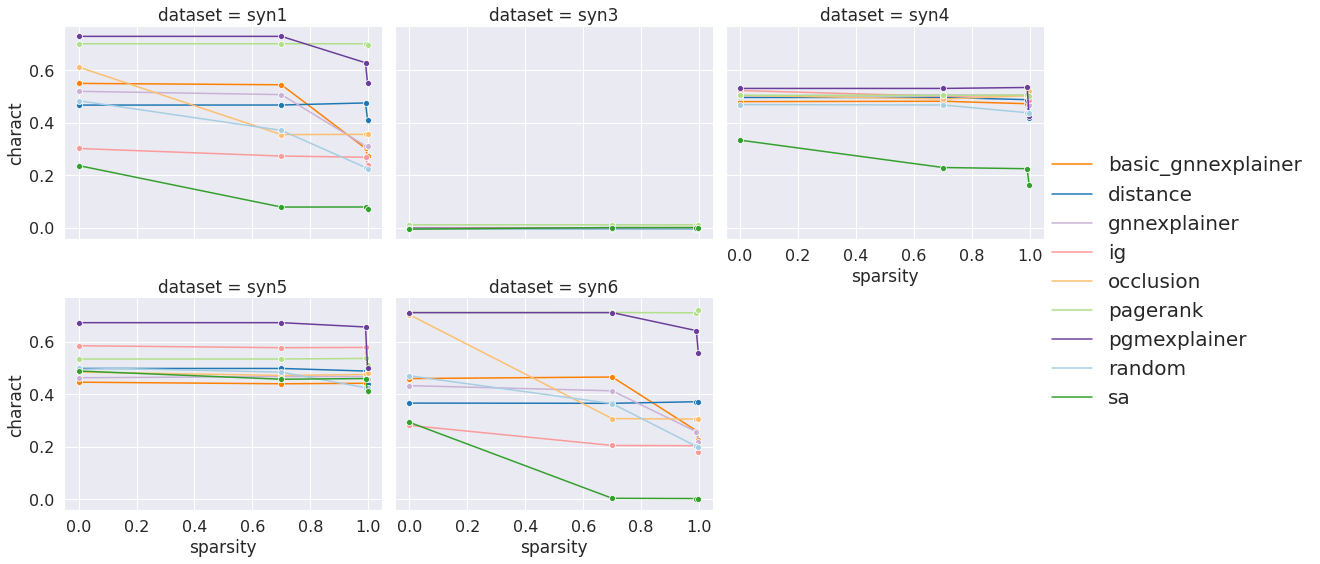

In [39]:
g = sns.FacetGrid(df_soft, col="dataset", height=4, aspect=1.25, col_wrap=3)
g.map_dataframe(sns.lineplot, x="sparsity", y="charact",
    hue="explainer_name", palette=dict_color, marker="o")

g.add_legend()

<AxesSubplot:xlabel='sparsity', ylabel='charact'>

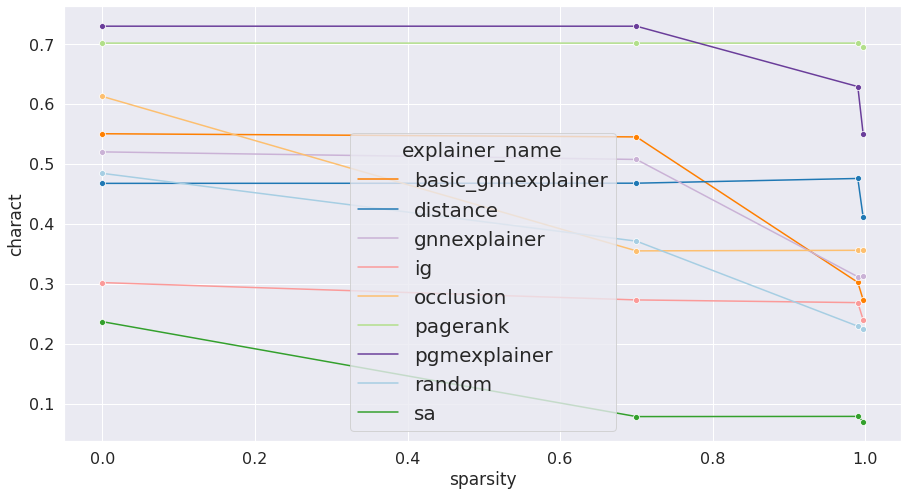

In [42]:
dataset_name = "syn1"

fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(
    data=df_soft[df_soft.dataset==dataset_name],
    x="sparsity", y="charact",
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)


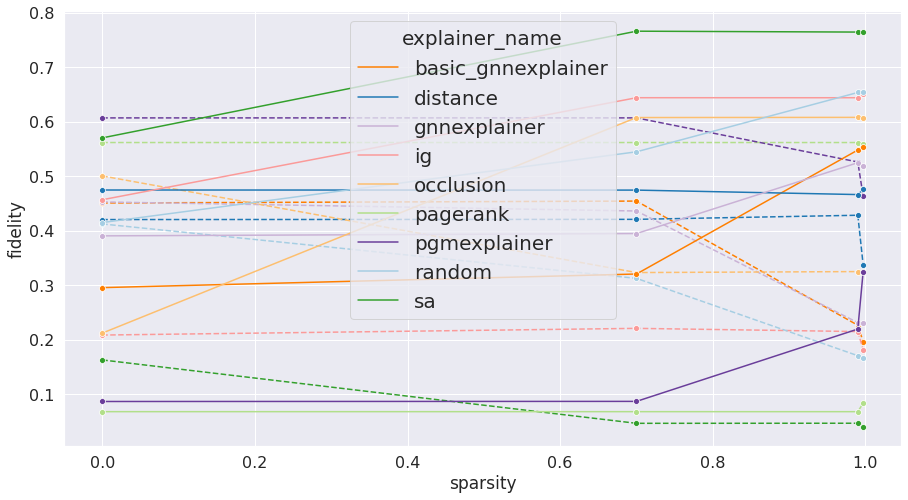

In [44]:
#### Fidelity Prob VS Sparsity ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_soft[df_soft.dataset=="syn1"],
    x="sparsity", y="fidelity_prob+",
    hue="explainer_name", palette=dict_color, marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_soft[df_soft.dataset=="syn1"],
    x="sparsity", y="fidelity_prob-",
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)


plt.ylabel('fidelity')
plt.show()

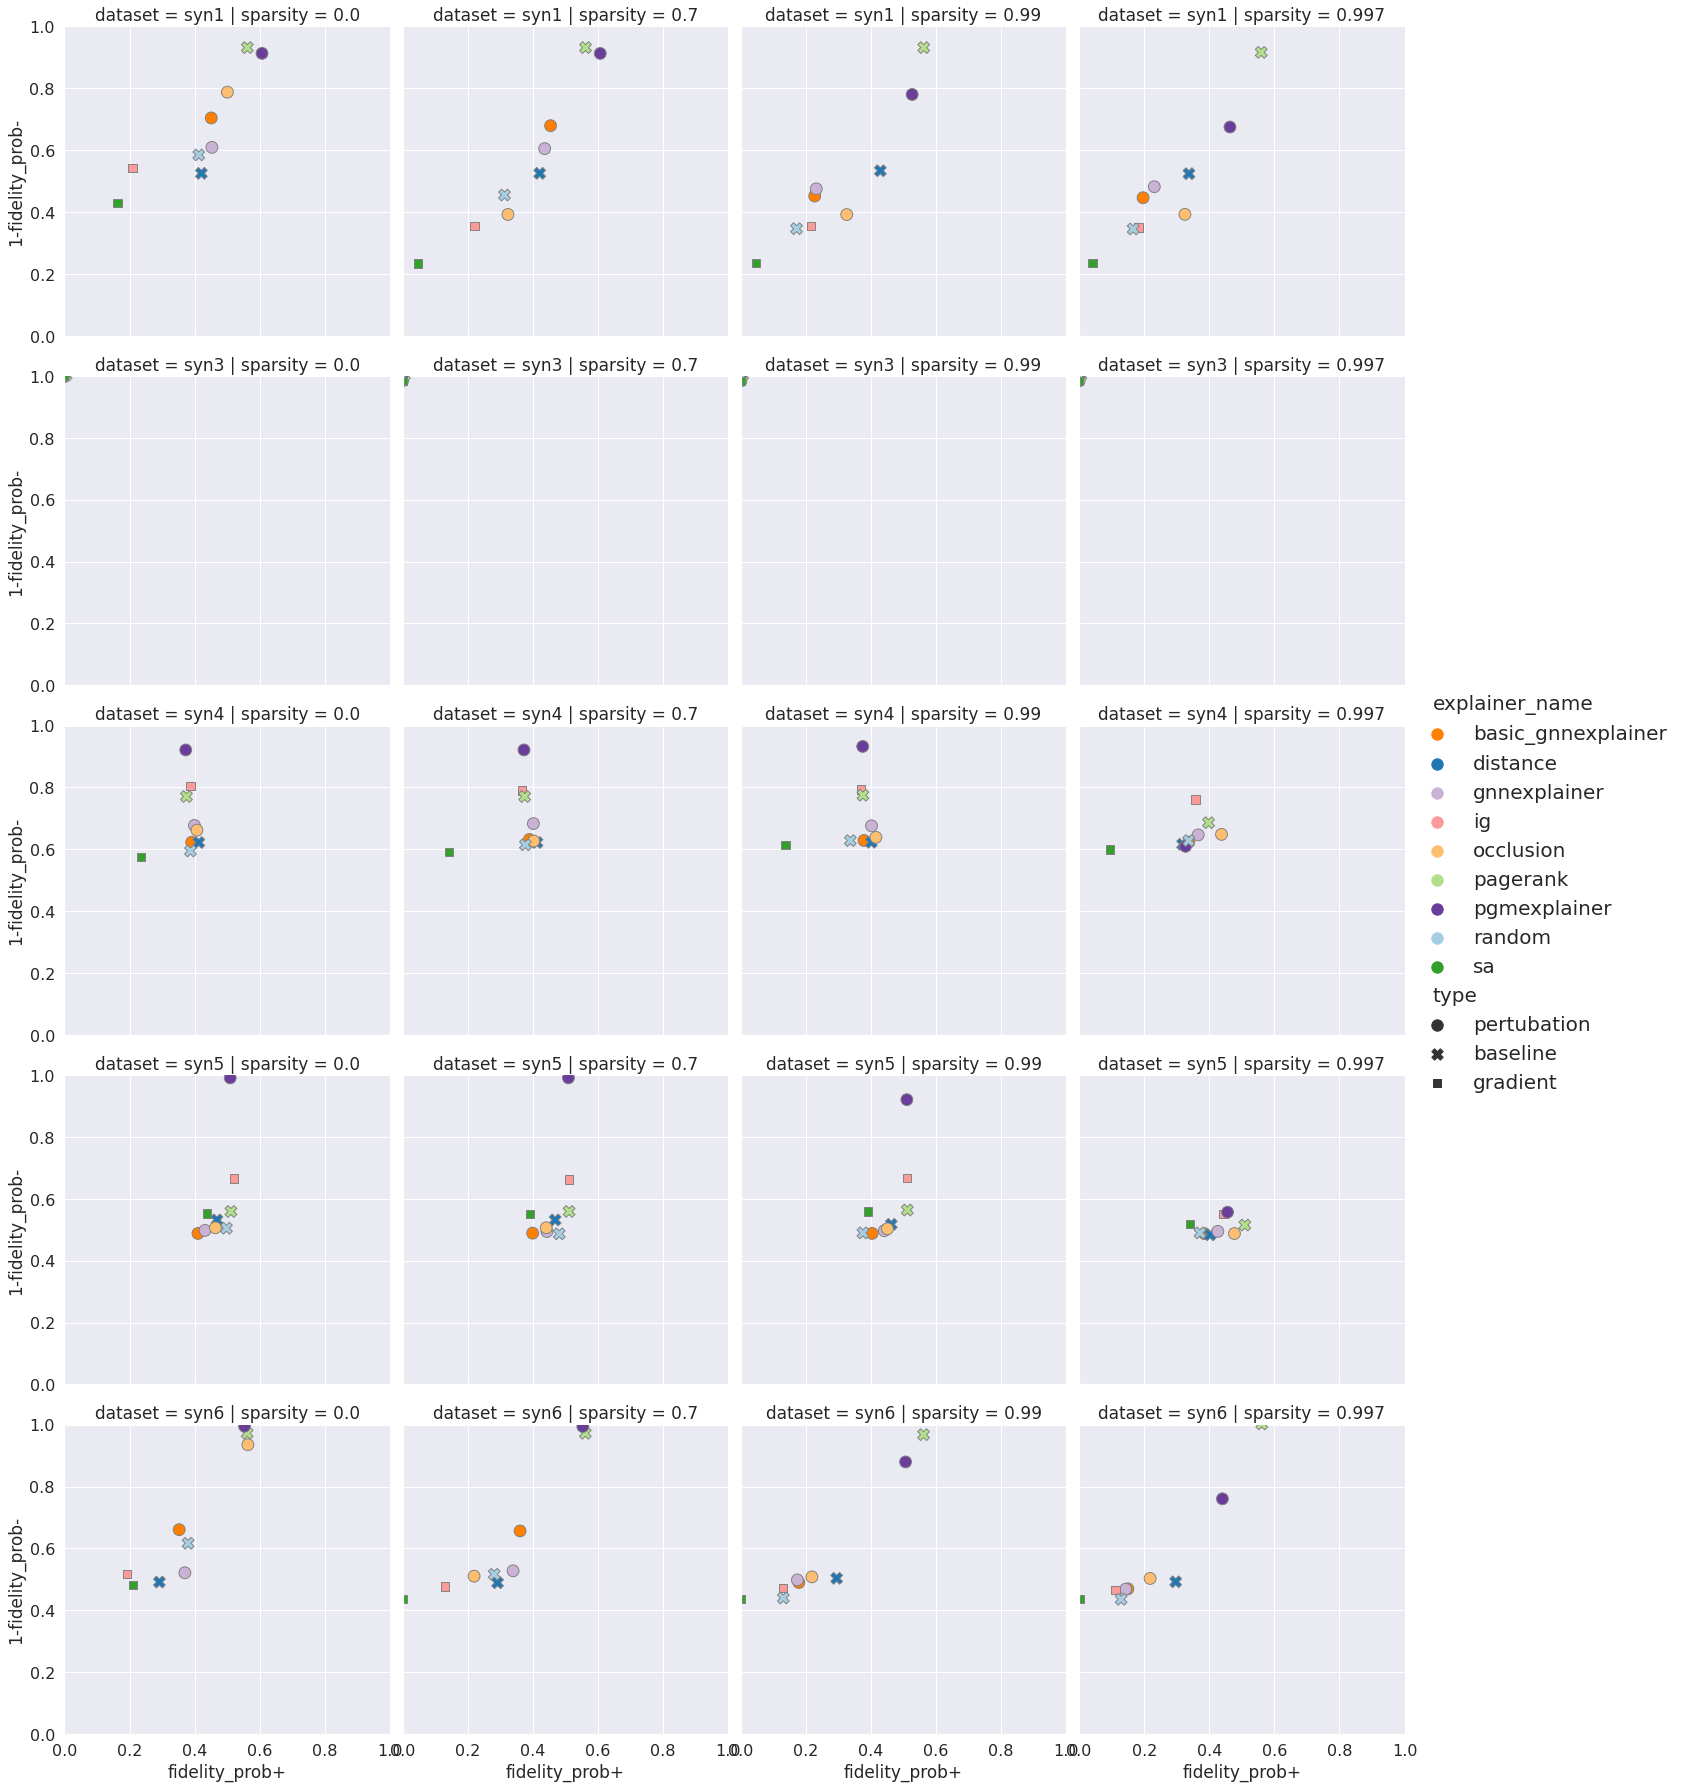

In [45]:
#### Fidelity Prob VS datasets & sparsity ####
g = sns.relplot(
        data=df_soft,
        x="fidelity_prob+", y="1-fidelity_prob-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha = 1, edgecolor="grey"
    )
plt.xlim(0, 1)
plt.ylim(0, 1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 

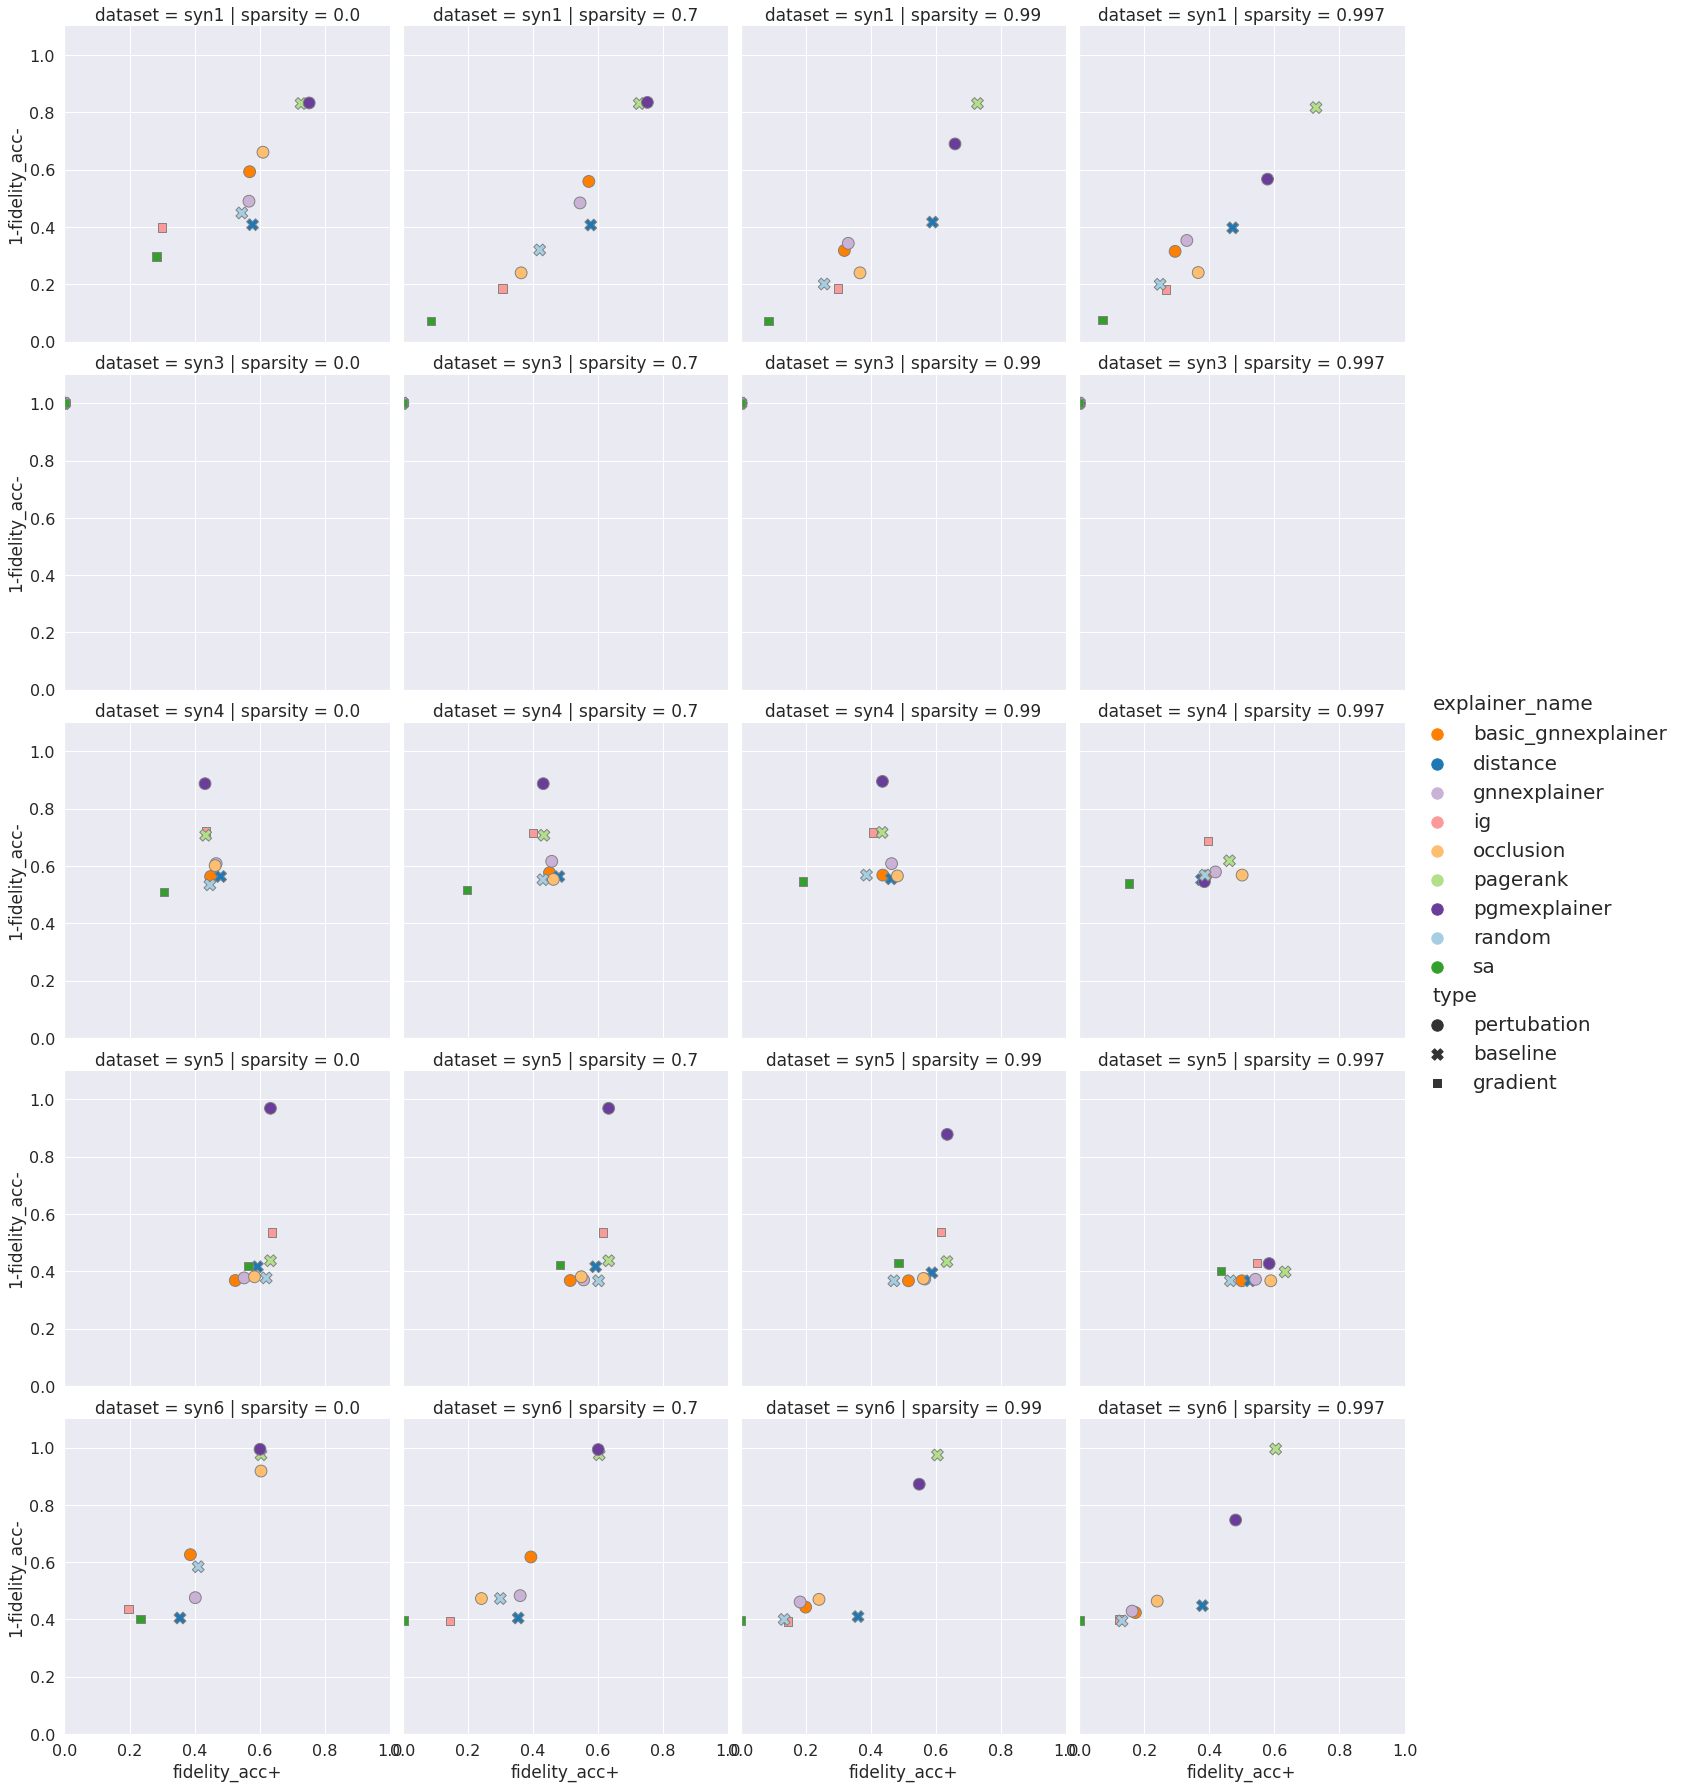

In [46]:
#### Fidelity Acc VS datasets & sparsity ####
g = sns.relplot(
        data=df_soft,
        x="fidelity_acc+", y="1-fidelity_acc-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha =1, edgecolor="grey"
    )

plt.xlim(0, 1)
plt.ylim(0, 1.1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 

# Explain focus: GNN model

true_label_as_target = False

In [31]:
df_gnn = df_sparsity[df_sparsity['true_label_as_target']==False].reset_index()

## Hard mask

In [32]:
df_gnn_hard = df_gnn[df_gnn.hard_mask==True]

In [33]:
df0 = df_gnn_hard.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean().reset_index()
df0s = df0[df0.sparsity==0.7]
res_init = df0s[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
res_init.groupby(by=['dataset', 'explainer_name']).mean()
#### Average characterization power among datasets for sparsity=0.7 ####
df_char = pd.pivot_table(res_init, values='charact', index=['explainer_name'], columns='dataset')
df_char['mean_charact'] = df_char.mean(axis=1)
df_char.sort_values(by=['mean_charact'])

dataset,syn1,syn3,syn4,syn5,syn6,mean_charact
explainer_name,,,,,,
basic_gnnexplainer,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0
distance,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0
gnnexplainer,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0
ig,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0
occlusion,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0
pagerank,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0
pgmexplainer,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0
random,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0
sa,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0


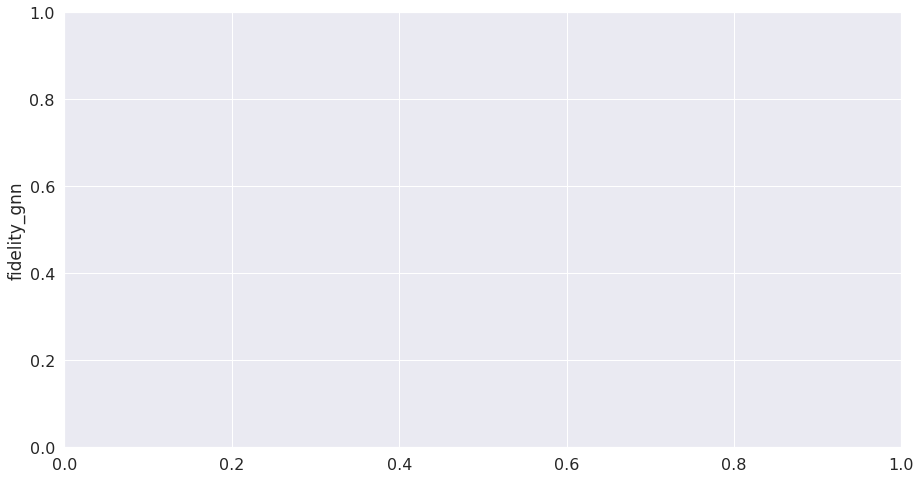

In [34]:
#### Fidelity Prob VS Sparsity ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_gnn_hard[df_gnn_hard.dataset=="cora"],
    x="sparsity", y="fidelity_gnn_prob+",
    hue="explainer_name", marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_gnn_hard[df_gnn_hard.dataset=="cora"],
    x="sparsity", y="fidelity_gnn_prob-",
    hue="explainer_name", marker="o", ax=ax)


plt.ylabel('fidelity_gnn')
plt.show()

KeyboardInterrupt: 

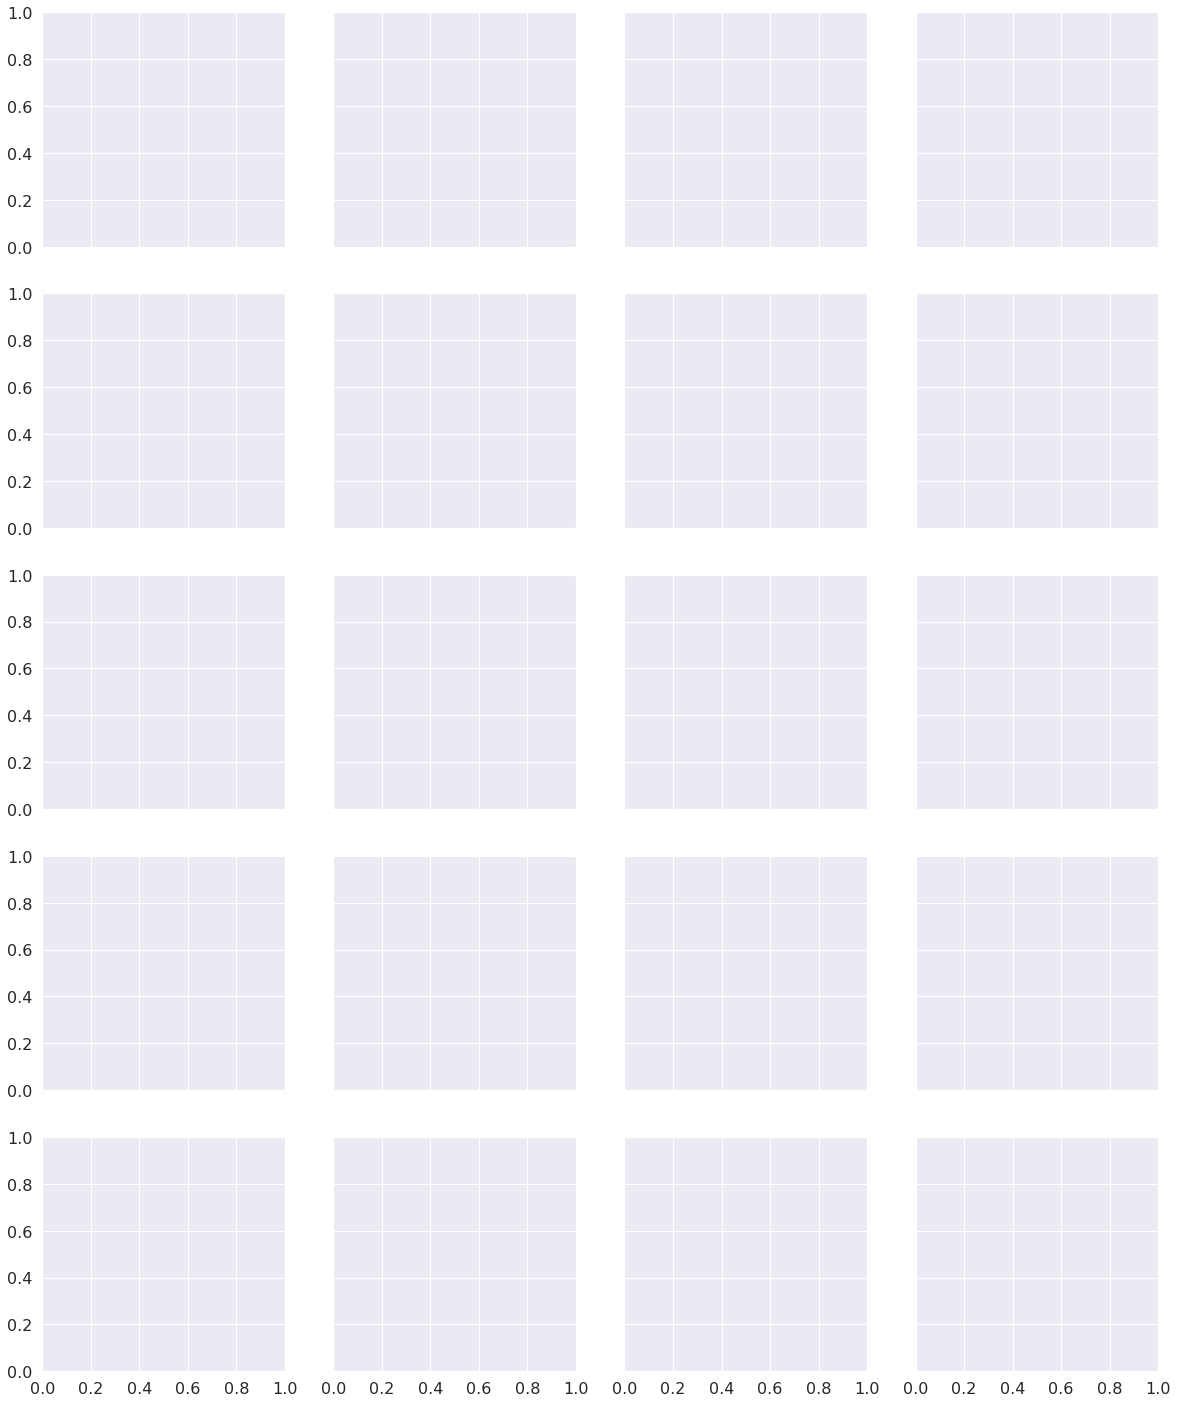

In [35]:
#### Fidelity Prob VS datasets & sparsity ####
g = sns.relplot(
        data=df_gnn_hard,
        x="fidelity_gnn_prob+", y="1-fidelity_gnn_prob-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha = 1, edgecolor="grey"
    )

plt.xlim(0, 1)
plt.ylim(0, 1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 

In [ ]:
#### Fidelity Acc VS datasets & sparsity ####
g = sns.relplot(
        data=df_gnn_hard,
        x="fidelity_gnn_acc+", y="1-fidelity_gnn_acc-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha =1, edgecolor="grey"
    )
plt.xlim(0, 1)
plt.ylim(0, 1.1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 

## Soft mask

In [ ]:
df_gnn_soft = df_gnn[df_gnn.hard_mask==False]

In [ ]:
##### Characterization #####
df1 = df_gnn_soft.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean().reset_index()
df1s = df1[df1.sparsity==0.7]
res_init = df1s[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
res_init.groupby(by=['dataset', 'explainer_name']).mean()
#### Average characterization power among datasets for sparsity=0.7 ####
df_char = pd.pivot_table(res_init, values='charact', index=['explainer_name'], columns='dataset')
df_char['mean_charact'] = df_char.mean(axis=1)
df_char.sort_values(by=['mean_charact'])

In [ ]:
#### Fidelity Prob VS Sparsity ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_gnn_soft[df_gnn_soft.dataset=="cora"],
    x="sparsity", y="fidelity_gnn_prob+",
    hue="explainer_name", palette=dict_color, marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_gnn_soft[df_gnn_soft.dataset=="cora"],
    x="sparsity", y="fidelity_gnn_prob-",
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)


plt.ylabel('fidelity')
plt.show()

In [ ]:
#### Fidelity Prob VS datasets & sparsity ####
g = sns.relplot(
        data=df_gnn_soft,
        x="fidelity_gnn_prob+", y="1-fidelity_gnn_prob-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha =1, edgecolor="grey"
    )
plt.xlim(0, 1)
plt.ylim(0, 1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 

In [ ]:
#### Fidelity Acc VS datasets & sparsity ####
g = sns.relplot(
        data=df_gnn_soft,
        x="fidelity_gnn_acc+", y="1-fidelity_gnn_acc-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha =1, edgecolor="grey"
    )

plt.xlim(0, 1)
plt.ylim(0, 1.1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 

# Characterization Summary

In [ ]:
sparsity = 0.99
names = ["_hard", "_soft", "_gnn_hard", "_gnn_soft"]
dfs = []
for name in names:
    df = eval("df"+name).groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean().reset_index()
    df_small = df[df.sparsity==sparsity]
    res_init = df_small[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
    res_init.groupby(by=['dataset', 'explainer_name']).mean()
    #### Average characterization power among datasets for sparsity=0.7 ####
    df_char = pd.pivot_table(res_init, values='charact', index=['explainer_name'], columns='dataset')
    df_char['charact'] = df_char.mean(axis=1)
    df_char.sort_values(by=['charact'])

    c = df_char.rename_axis(None, axis=1).reset_index()
    c = c[["explainer_name", "charact"]]
    dfs.append(c)
    

    

In [ ]:
for i in range(4):
    locals()["c"+names[i]] = dfs[i]

In [ ]:
s_phen = pd.merge(dfs[0], dfs[1], on="explainer_name", how="outer", suffixes=["_phen_hard", "_phen_soft"])
s_gnn = pd.merge(dfs[2], dfs[3], on="explainer_name", how="outer", suffixes=["_gnn_hard", "_gnn_soft"])
summary = pd.merge(s_phen, s_gnn, on="explainer_name", how="outer")
summary = summary.sort_values(by=['charact_phen_soft', 'charact_phen_hard'])
summary

In [ ]:
summary.to_csv(f'/cluster/home/kamara/Explain/csv/node_classification/syn/summary/charact_summary_avg10expe_{sparsity}.csv')